In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
df=pd.read_csv('loan_train.csv')
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [117]:
df.shape

(614, 12)

In [118]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [119]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [120]:
df.size

7368

In [121]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object

In [122]:
#Visualization graph


In [123]:
df2=df['Married'].value_counts()
df2

Married
Yes    398
No     213
Name: count, dtype: int64

<BarContainer object of 2 artists>

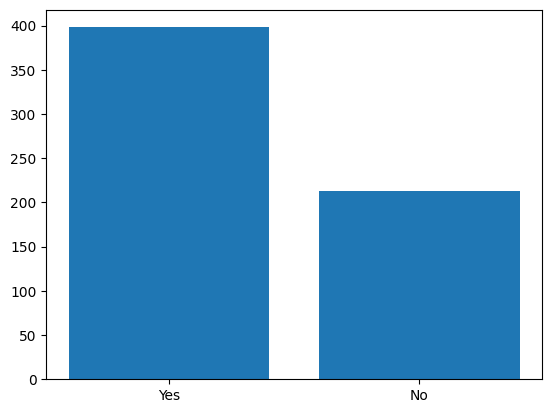

In [124]:
#Visualization
plt.bar(df2.index,df2.values)

In [125]:
df3=df['Dependents'].value_counts()
df3

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

<BarContainer object of 4 artists>

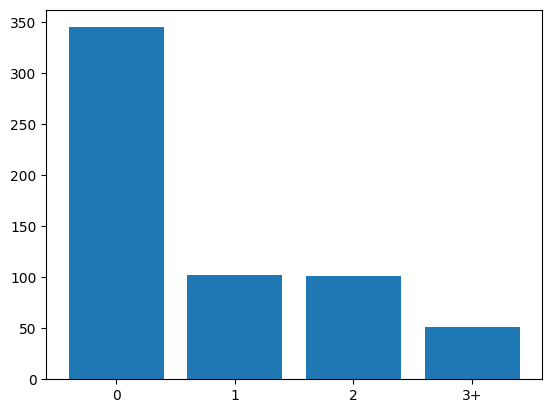

In [126]:
#Visualization Deependents
plt.bar(df3.index,df3.values)

In [127]:
df4=df['Education'].value_counts()
df4

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

<BarContainer object of 2 artists>

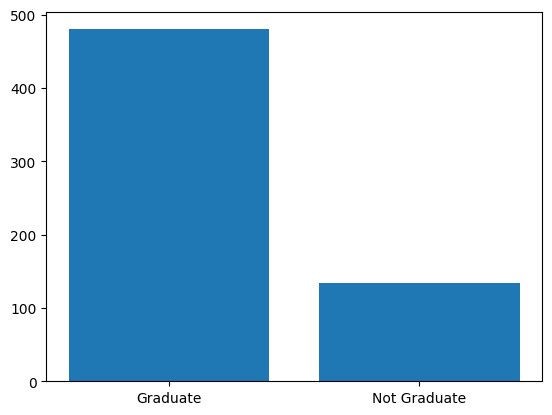

In [128]:
#Visualization Education
plt.bar(df4.index,df4.values)

In [129]:
df5=df['Self_Employed'].value_counts()
df5

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

<BarContainer object of 2 artists>

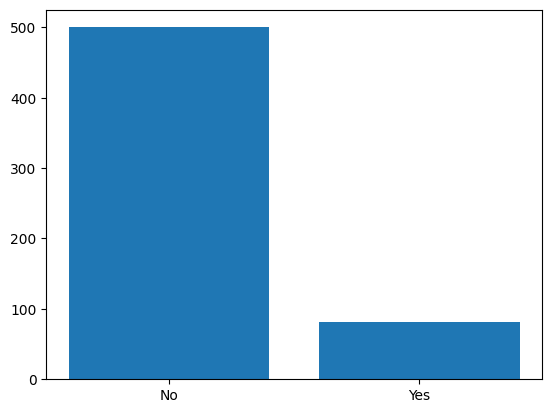

In [130]:
#Visualization Self_Employed

plt.bar(df5.index,df5.values)

In [131]:
df6=df['Area'].value_counts()
df6

Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [132]:
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [133]:
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [134]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [135]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [136]:
df.isna().sum()

Gender                13
Married                0
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [137]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [138]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [139]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [140]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [141]:
df['Term']=df['Term'].fillna(df['Term'].mode()[0])

In [142]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [143]:
df['Status']=df['Status'].fillna(df['Status'].mode()[0])


In [144]:
df.isna().sum()

Gender                13
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [145]:
df.drop(['Gender'], axis=1, inplace=True)


In [146]:
df.head()

,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [147]:
#Encoding

from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

df["Married"]=lab.fit_transform(df["Married"])
df["Dependents"]=lab.fit_transform(df["Dependents"])
df["Education"]=lab.fit_transform(df["Education"])
df["Self_Employed"]=lab.fit_transform(df["Self_Employed"])
df["Area"]=lab.fit_transform(df["Area"])

In [148]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [150]:
x_train

,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
553,1,0,1,0,245400,233300.0,18100000,360.0,0.0,2
601,1,0,1,0,289400,279200.0,15500000,360.0,1.0,0
261,0,0,0,0,206000,220900.0,13400000,360.0,1.0,1
496,1,0,1,0,260000,170000.0,10700000,360.0,1.0,0
529,0,0,1,0,678300,0.0,13000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
71,1,2,1,1,187500,187500.0,9700000,360.0,1.0,1
106,1,2,0,0,1141700,112600.0,22500000,360.0,1.0,2
270,0,0,0,0,323700,0.0,3000000,360.0,1.0,2
435,1,0,0,0,1004700,0.0,0,240.0,1.0,1


In [151]:
x_test

,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
350,1,0,0,0,908300,0.0,22800000,360.0,1.0,1
377,1,0,0,0,431000,0.0,13000000,360.0,1.0,1
163,1,2,0,0,416700,144700.0,15800000,360.0,1.0,0
609,0,0,0,0,290000,0.0,7100000,360.0,1.0,0
132,0,0,0,0,271800,0.0,7000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
380,1,0,0,0,333300,250000.0,12800000,360.0,1.0,1
446,1,2,1,0,465200,0.0,11000000,360.0,1.0,0
144,1,2,0,0,1175700,0.0,18700000,180.0,1.0,2
290,1,0,0,0,307500,241600.0,13900000,360.0,1.0,0


In [152]:
y_train

553    N
601    Y
261    Y
496    Y
529    Y
      ..
71     Y
106    Y
270    Y
435    Y
102    Y
Name: Status, Length: 429, dtype: object

In [153]:
y_test

350    Y
377    Y
163    Y
609    Y
132    Y
      ..
380    Y
446    Y
144    Y
290    Y
353    N
Name: Status, Length: 185, dtype: object

In [154]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [155]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [156]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 27,  38],
       [  2, 118]])

In [157]:
score=accuracy_score(y_test,y_pred)
score

0.7837837837837838

In [158]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
from sklearn.naive_bayes import BernoulliNB
base=BernoulliNB()
from sklearn.svm import SVC
sv=SVC()


In [159]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [161]:
lst=[knn,base,sv]
for i in lst:
    print("Model name is ",i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    y_pred
    print("**********************************************************************************************")
    print("Model Confusion metrics is ")
    print(confusion_matrix(y_test,y_pred))
    print("**********************************************************************************************")
    print("Accuracy Score is")
    print(accuracy_score(y_test,y_pred))
    print("**********************************************************************************************")
    print("Classification Report is")
    print(classification_report(y_test,y_pred))


Model name is  KNeighborsClassifier(n_neighbors=7)
**********************************************************************************************
Model Confusion metrics is 
[[ 28  37]
 [  2 118]]
**********************************************************************************************
Accuracy Score is
0.7891891891891892
**********************************************************************************************
Classification Report is
              precision    recall  f1-score   support

           N       0.93      0.43      0.59        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.79       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.79      0.76       185

Model name is  BernoulliNB()
**********************************************************************************************
Model Confusion metrics is 
[[ 27  38]
 [  2 118]]
*************************************************